# ch06 金融时间序列
在金融学中遇到的最重要的数据类型之一是金融时间序列。这是以日期和/或时间作为索引的数据。
## 6.1 pandas基础
从最根本的层面上看，DataFraame类设计用来管理具有索引和标签的数据。

In [1]:
import numpy as np
import pandas as pd

## 6.1.1使用DataFrame类的第一步

In [2]:
df = pd.DataFrame([10,20,30,40],columns=['numbers'],
                 index=['a','b','c','d'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [4]:
df.columns

Index([u'numbers'], dtype='object')

In [5]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [6]:
df.loc[['a','b']]

,numbers
a,10
b,20


In [7]:
df.loc[df.index[1:3]]

,numbers
b,20
c,30


In [8]:
df.sum()

numbers    100
dtype: int64

In [9]:
df.apply(lambda x:x**2)

,numbers
a,100
b,400
c,900
d,1600


一般来说，可以在DataFrame对象上进行和NumPy ndarray对象相同的向量化操作：

In [10]:
df ** 2

,numbers
a,100
b,400
c,900
d,1600


在两个维度上同时扩增DataFrame对象是可能的：

In [11]:
df['floats']=(1.5,2.5,3.5,4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [12]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

也可以取整个DataFrame对象来定义一个新列，在这种情况下，索引自动分配：

In [13]:
df['names'] = pd.DataFrame(['Yves','Guido','Felix','Francesc'],
                          index=['d','a','b','c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


附加数据的方法也类似，但下例中会看到通常必须避免的一个副作用--索引被简单的编号索引代替：

In [14]:
df.append({'numbers':100,'floats':5.75,'names':'Henry'},
         ignore_index=True)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


附加一个DataFrame对象以提供正确的索引信息往往是更好的做法。下列保留这种索引：

In [15]:
df = df.append(pd.DataFrame({'numbers':100,'floats':5.75,'names':'Henry'},
         index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


pandas的优势之一是处理缺漏的信息。为此，考虑如下代码，添加一个新列，但是使用稍微不同的索引。在此使用相当灵活的**join**方法：

In [16]:
df.join(pd.DataFrame([1,4,9,16,25],
                    index=['a','b','c','d','y'],
                    columns=['squares',]))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


pandas默认只接受索引已经存在的值，为了保留这两个索引，可以提供一个附加参数，告诉pandas如何连接：

In [17]:
df=df.join(pd.DataFrame([1,4,9,16,25],
                    index=['a','b','c','d','y'],
                    columns=['squares',]),
           how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


连接操作的其他选项包括**inner、left、right**。尽管有丢失的值，但是大部分方法调用任有效：

In [18]:
df[['numbers','squares']].mean()

numbers    40.0
squares    11.0
dtype: float64

In [19]:
df[['numbers','squares']].std()

numbers    35.355339
squares     9.669540
dtype: float64

### 6.1.2 使用DataFrame类的第二步
从现在开始，我们将处理数值型数据。随着进程增加**DatetimeIndex**等功能，以管理时间序列数据。首先生成一个包含9行4列标准正态分布伪随机数的**numpy.ndarray**:

In [20]:
a = np.random.standard_normal((9,4))
a.round(6)

array([[-2.229479,  0.739865,  1.008732,  0.394912],
       [ 0.588533, -1.072611,  2.21312 , -0.219842],
       [-0.934603, -1.002149,  1.031371,  1.705312],
       [ 0.157323, -0.325937, -0.870771, -0.664154],
       [-0.842105,  0.916916,  0.235922,  0.496125],
       [ 1.247343,  0.444201,  0.568674,  0.779886],
       [-1.35171 , -0.319915,  1.79235 ,  0.878209],
       [-0.107673, -0.403622, -0.062431, -1.197629],
       [ 2.27742 ,  0.070225,  1.560684, -0.143699]])

可以如前面一样直接构造**DataFrame**对象，但使用**ndarray**对象通常是一个好选择，因为**pandas**将保留基本结构，“只”添加元信息（例如索引值），例如：

In [21]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-2.229479,0.739865,1.008732,0.394912
1,0.588533,-1.072611,2.213120,-0.219842
2,-0.934603,-1.002149,1.031371,1.705312
3,0.157323,-0.325937,-0.870771,-0.664154
4,-0.842105,0.916916,0.235922,0.496125
5,1.247343,0.444201,0.568674,0.779886
6,-1.351710,-0.319915,1.792350,0.878209
7,-0.107673,-0.403622,-0.062431,-1.197629
8,2.277420,0.070225,1.560684,-0.143699


表 6-1 DataFrame函数参数

| 参数  | 格式  | 描述|
|:---|:-----|:----|
| data| ndarray/字典/DataFrame| DataFrame数据：字典可以包含序列、ndarray和列表|
| index| 索引/类似数组| 使用的索引；默认为range(n)| 
| columns| 索引/类似数组| 使用的列标题；默认为range(n)|
| dtype| dtype，默认None| 使用/强制的数据类型；否则通过推到得出|
| copy| 布尔值，默认None| 从输入拷贝数据|

DataFrame 对象可以通过指定一个具有合适数最元素的列表，直接定义列名:

In [22]:
df.columns = [['No1','No2','No3','No4']]
df

,No1,No2,No3,No4
0,-2.229479,0.739865,1.008732,0.394912
1,0.588533,-1.072611,2.213120,-0.219842
2,-0.934603,-1.002149,1.031371,1.705312
3,0.157323,-0.325937,-0.870771,-0.664154
4,-0.842105,0.916916,0.235922,0.496125
5,1.247343,0.444201,0.568674,0.779886
6,-1.351710,-0.319915,1.792350,0.878209
7,-0.107673,-0.403622,-0.062431,-1.197629
8,2.277420,0.070225,1.560684,-0.143699


列名提供访问DataFrame对象中数据的高效机制，同样和结构数组类似：

In [23]:
df['No2'][3]

-0.32593712577048284

为了高效处理金融事件序列数据，还必须很好地处理时间索引这也可以视为pandas的一个重要优势：

In [24]:
dates = pd.date_range('2015-1-1',periods=9,freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

表 6-2 date_range函数参数

| 参数  | 格式  | 描述|
|:---|:-----|:----|
| start| 字符串/日期时间| 生成日期的左界|
| end| 字符串/日期时间| 生成日期的右界|
| periods| 整数/None| 期数（如果start或者end空缺）|
| freq| 字符串/字符串/日期偏移| 频率字符串，例如5D（5天）|
| tz| 字符串/None| 本地化索引的时区名称|
| normalize| 布尔值，默认None| 将start和end规范化为午夜|
| name| 字符串，默认None| 结果索引名称|

目前我们只遇到过由字符串和整数对象组成的索引，但是，对于时间序列数据，当然需要由date_range函数生成的DatetimeIndex对象。
和列一样,我们将新生成的Datetimelndex作为新的Index对象，赋给DataFrame对象:

In [25]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-2.229479,0.739865,1.008732,0.394912
2015-02-28,0.588533,-1.072611,2.213120,-0.219842
2015-03-31,-0.934603,-1.002149,1.031371,1.705312
2015-04-30,0.157323,-0.325937,-0.870771,-0.664154
2015-05-31,-0.842105,0.916916,0.235922,0.496125
2015-06-30,1.247343,0.444201,0.568674,0.779886
2015-07-31,-1.351710,-0.319915,1.792350,0.878209
2015-08-31,-0.107673,-0.403622,-0.062431,-1.197629
2015-09-30,2.277420,0.070225,1.560684,-0.143699


表 6-3 date_range函数频率参数值

| 别名| 描述|
|:---|:----|
| B| 交易日|
| C| 自定义交易日（试验性）|
| D| 日历日|
| W| 每周|
| M| 每月底|
| BM| 每月最后一个交易日|
| MS| 月初|
| BMS| 每月第一个交易日|
| Q| 季度末|
| BQ| 每季度最后一个交易日|
| QS| 季度初|
| BQS| 每季度第一个交易日|
| A| 每年底|
| BA| 每年最后一个交易日|
| AS| 每年初|
| BAS| 每年第一个交易日|
| H| 每小时|
| T| 每分钟|
| S| 每秒|
| L| 毫秒|
| U| 微秒|

上面的例子是从**Numpy ndarray**对象生成**pandas DataFrame**对象；可以反过来：

In [26]:
np.array(df).round(6)

array([[-2.229479,  0.739865,  1.008732,  0.394912],
       [ 0.588533, -1.072611,  2.21312 , -0.219842],
       [-0.934603, -1.002149,  1.031371,  1.705312],
       [ 0.157323, -0.325937, -0.870771, -0.664154],
       [-0.842105,  0.916916,  0.235922,  0.496125],
       [ 1.247343,  0.444201,  0.568674,  0.779886],
       [-1.35171 , -0.319915,  1.79235 ,  0.878209],
       [-0.107673, -0.403622, -0.062431, -1.197629],
       [ 2.27742 ,  0.070225,  1.560684, -0.143699]])

### 6.1.3 基本分析
和**NumPy**数组一样，**pandas DataFrame**类有多个便利的内建方法：

In [27]:
df.sum()

No1   -1.194949
No2   -0.953027
No3    7.477651
No4    2.029120
dtype: float64

In [28]:
df.mean()

No1   -0.132772
No2   -0.105892
No3    0.830850
No4    0.225458
dtype: float64

In [29]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-2.229479,0.739865,1.008732,0.394912
2015-02-28,-1.640946,-0.332746,3.221852,0.175070
2015-03-31,-2.575549,-1.334894,4.253224,1.880382
2015-04-30,-2.418225,-1.660831,3.382453,1.216228
2015-05-31,-3.260330,-0.743916,3.618375,1.712354
2015-06-30,-2.012987,-0.299715,4.187049,2.492240
2015-07-31,-3.364697,-0.619630,5.979399,3.370448
2015-08-31,-3.472369,-1.023252,5.916968,2.172819
2015-09-30,-1.194949,-0.953027,7.477651,2.029120


In [30]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.132772,-0.105892,0.830850,0.225458
std,1.385049,0.708497,0.971841,0.878676
min,-2.229479,-1.072611,-0.870771,-1.197629
25%,-0.934603,-0.403622,0.235922,-0.219842
50%,-0.107673,-0.319915,1.008732,0.394912
75%,0.588533,0.444201,1.560684,0.779886
max,2.277420,0.916916,2.213120,1.705312


也可以对**DataFrame**对象应用大部分**NumPy**通用函数：
>一般来说，在**NumPy**通用函数适用于**ndarray**对象的任何情况下，都可以将这些函数应用到包含相同数据的**pandas DataFrame**对象。

In [31]:
np.sqrt(df)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2015-01-31,NaN,0.860154,1.004357,0.628420
2015-02-28,0.767159,NaN,1.487656,NaN
2015-03-31,NaN,NaN,1.015565,1.305876
2015-04-30,0.396640,NaN,NaN,NaN
2015-05-31,NaN,0.957557,0.485718,0.704362
2015-06-30,1.116845,0.666484,0.754105,0.883111
2015-07-31,NaN,NaN,1.338787,0.937128
2015-08-31,NaN,NaN,NaN,NaN
2015-09-30,1.509112,0.265000,1.249273,NaN


**pandas**有相当强的容错能力，它可以捕捉错误，在对应数学运算失败时放入**NaN**值。不仅如此，正如前面已经展示的，在许多情况下，还可以将这些不完整的数据集当成完整数据集来使用，此时不考虑**NaN**值，只使用其他可用值：

In [32]:
np.sqrt(df).sum()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    3.789757
No2    2.749195
No3    7.335460
No4    4.458897
dtype: float64

本质上，**pandas**提供**matplotlib**的一个封装器，专门为**DataFrame**对象所设计。

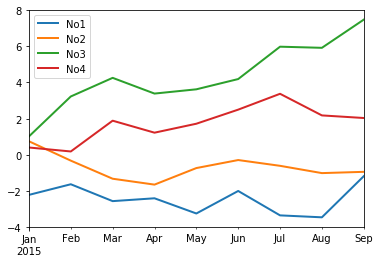

In [33]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

### 6.1.4 Series 类

In [34]:
type(df)

pandas.core.frame.DataFrame

在从**DataFrame**对象中选择单一列时，就得到一个**Series**对象:

In [35]:
df['No1']

2015-01-31   -2.229479
2015-02-28    0.588533
2015-03-31   -0.934603
2015-04-30    0.157323
2015-05-31   -0.842105
2015-06-30    1.247343
2015-07-31   -1.351710
2015-08-31   -0.107673
2015-09-30    2.277420
Freq: M, Name: No1, dtype: float64

In [36]:
type(df['No1'])

pandas.core.series.Series

Text(0,0.5,u'value')

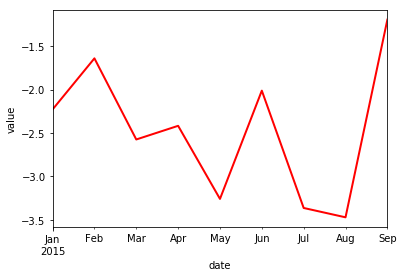

In [37]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r',lw=2.)
plt.xlabel('date')
plt.ylabel('value')

### 6.1.5 GroupBy 操作

In [38]:
df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-2.229479,0.739865,1.008732,0.394912,Q1
2015-02-28,0.588533,-1.072611,2.213120,-0.219842,Q1
2015-03-31,-0.934603,-1.002149,1.031371,1.705312,Q1
2015-04-30,0.157323,-0.325937,-0.870771,-0.664154,Q2
2015-05-31,-0.842105,0.916916,0.235922,0.496125,Q2
2015-06-30,1.247343,0.444201,0.568674,0.779886,Q2
2015-07-31,-1.351710,-0.319915,1.792350,0.878209,Q3
2015-08-31,-0.107673,-0.403622,-0.062431,-1.197629,Q3
2015-09-30,2.277420,0.070225,1.560684,-0.143699,Q3


In [39]:
groups = df.groupby('Quarter')
groups

In [40]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.858516,-0.444965,1.417741,0.626794
Q2,0.187521,0.345060,-0.022058,0.203952
Q3,0.272679,-0.217771,1.096867,-0.154373


In [41]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.588533,0.739865,2.213120,1.705312
Q2,1.247343,0.916916,0.568674,0.779886
Q3,2.277420,0.070225,1.792350,0.878209


In [42]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [43]:
df['Odd_Even'] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']

In [44]:
groups = df.groupby(['Quarter','Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [45]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.588533 -1.072611  2.213120 -0.219842
        Odd      -1.582041 -0.131142  1.020052  1.050112
Q2      Even      0.702333  0.059132 -0.151049  0.057866
        Odd      -0.842105  0.916916  0.235922  0.496125
Q3      Even     -0.107673 -0.403622 -0.062431 -1.197629
        Odd       0.462855 -0.124845  1.676517  0.367255

## 6.2 金融数据

In [47]:
import pandas as pd
#DAX = pd.DataFrame(columns=['Open','High','Low','Close','Volume','Adj Close']，)
DAX = pd.read_csv('..\python_for_finance\^GDAXI2.csv',
                  na_values='null',
                  index_col=0,
                 dtype={'Open': np.float64,'High': np.float64,'Low':np.float64,
                 'Close':np.float64,'Adj Close':np.float64,'Volume':np.float64})
DAX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 2000/1/3 to 2014/9/26
Data columns (total 6 columns):
Open         3748 non-null float64
High         3748 non-null float64
Low          3748 non-null float64
Close        3748 non-null float64
Adj Close    3748 non-null float64
Volume       3748 non-null float64
dtypes: float64(6)
memory usage: 207.0+ KB


In [48]:
len(DAX[DAX.isnull().values==True])

228

In [49]:
DAX = DAX.dropna()
DAX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 2000/1/3 to 2014/9/26
Data columns (total 6 columns):
Open         3748 non-null float64
High         3748 non-null float64
Low          3748 non-null float64
Close        3748 non-null float64
Adj Close    3748 non-null float64
Volume       3748 non-null float64
dtypes: float64(6)
memory usage: 205.0+ KB


In [50]:
DAX['Volume']=DAX.astype('int64')

In [51]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 2000/1/3 to 2014/9/26
Data columns (total 6 columns):
Open         3748 non-null float64
High         3748 non-null float64
Low          3748 non-null float64
Close        3748 non-null float64
Adj Close    3748 non-null float64
Volume       3748 non-null int64
dtypes: float64(5), int64(1)
memory usage: 205.0+ KB


In [52]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014/9/22,9748.53,9812.769531,9735.690430,9749.540039,9749.540039,9748
2014/9/23,9713.40,9719.660156,9589.030273,9595.030273,9595.030273,9713
2014/9/24,9598.77,9669.450195,9534.769531,9661.969727,9661.969727,9598
2014/9/25,9644.36,9718.110352,9482.540039,9510.009766,9510.009766,9644
2014/9/26,9500.55,9545.339844,9454.879883,9490.549805,9490.549805,9500


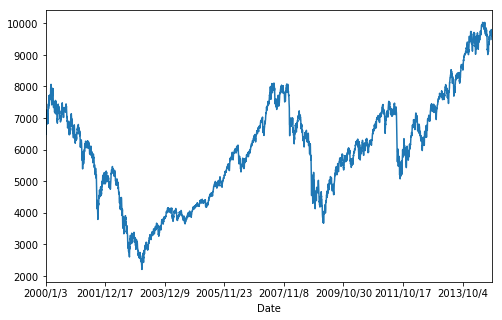

In [53]:
DAX['Close'].round().plot(figsize=(8,5))

**pandas**允许在整个**DataFrame**对象上进行向量化数学运算,根据每天的收盘价返回对数收益率就是一个实例；

用下面的代码可以添加包含对应信息的列，首先生成一个新的空列，然后在所有指数上进行循环，逐步计算单个对数收益率值:

In [54]:
%time
DAX['Ret_Loop']=0.0
for i in range(1,len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i]/DAX['Close'][i-1])

Wall time: 0 ns


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
DAX[['Close','Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2014/9/22,9749.540039,-0.005087
2014/9/23,9595.030273,-0.015975
2014/9/24,9661.969727,0.006952
2014/9/25,9510.009766,-0.015853
2014/9/26,9490.549805,-0.002048


也可以使用向量化代码，在不使用循环的情况下得到相同的结果；更紧凑更容易理解也更快速；

在这方面，**shift**方法很有用：

In [56]:
%time DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1))

Wall time: 1 ms


In [57]:
DAX[['Close','Ret_Loop','Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2014/9/22,9749.540039,-0.005087,-0.005087
2014/9/23,9595.030273,-0.015975,-0.015975
2014/9/24,9661.969727,0.006952,0.006952
2014/9/25,9510.009766,-0.015853,-0.015853
2014/9/26,9490.549805,-0.002048,-0.002048


一个对数收益率数据列就足够了，所以我们可以删除另一列：

In [58]:
del DAX['Ret_Loop']

In [59]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2014/9/22,9748.53,9812.769531,9735.690430,9749.540039,9749.540039,9748,-0.005087
2014/9/23,9713.40,9719.660156,9589.030273,9595.030273,9595.030273,9713,-0.015975
2014/9/24,9598.77,9669.450195,9534.769531,9661.969727,9661.969727,9598,0.006952
2014/9/25,9644.36,9718.110352,9482.540039,9510.009766,9510.009766,9644,-0.015853
2014/9/26,9500.55,9545.339844,9454.879883,9490.549805,9490.549805,9500,-0.002048


将新生成的收益率数据绘图：

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC03198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC65C50>], dtype=object)

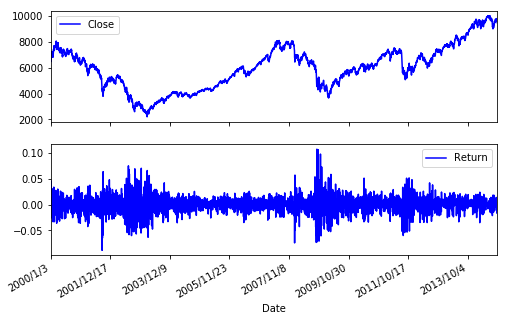

In [60]:
DAX[['Close','Return']].plot(subplots=True,style='b',figsize=(8,5))

上图展示了权益收益率的两种典型事实：

*波动率聚集*
    
    波动率不是长期恒定的；既有高峰波动率时期（正收益和负收益都很高），也有低波动率时期。

*杠杆效应*
   
    一般来说，波动性和股票市场收益是负相关的；当市场下跌的时候波动性升高，反之亦然。
    
波动率对期权交易者特别重要，而（技术型）股票交易者可能对移动平均值（所谓趋势）更感兴趣。移动平均值很容易用**pandas**的**rolling_mean**函数计算（还有其他一些“滚动”函数，如**rolling_max、rolling_min**和**rolling_corr**）：

In [61]:
DAX['42d']=pd.rolling_mean(DAX['Close'],window=42)
DAX['252d']=pd.rolling_mean(DAX['Close'],window=252)
DAX[['Close','42d','252d']].tail()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  


,Close,42d,252d
Date,,,
2014/9/22,9749.540039,9464.947103,9429.624814
2014/9/23,9595.030273,9463.780924,9433.433307
2014/9/24,9661.969727,9465.299967,9437.391125
2014/9/25,9510.009766,9461.880441,9440.741839
2014/9/26,9490.549805,9459.424967,9444.021403


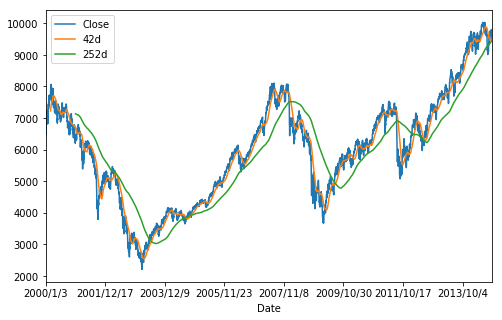

In [62]:
DAX[['Close','42d','252d']].plot(figsize=(8,5))

回到期权交易者更喜欢的话题，对数收益率的移动历史标准差--即异动历史波动率--可能更有趣：

In [63]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],window=252)*math.sqrt(252)#移动年波动率

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DADB588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED6C518>], dtype=object)

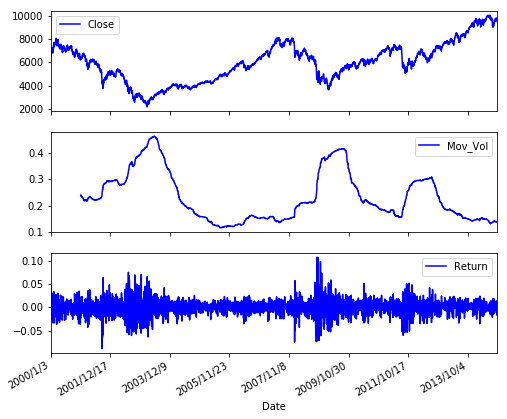

In [64]:
DAX[['Close','Mov_Vol','Return']].plot(subplots = True,style='b',figsize=(8,7))

上图进一步支持杠杆效应假设，说明市场下跌时历史移动波动率倾向于升高，而在市场上涨时波动率下降。
## 6.3 回归分析
杠杆效应是权益市场收益率的典型事实。目前为止，我们提供的支持仅基于对金融数据图表的检验。使用**pandas**，还可以在更正式的统计学基础上进行这类分析。最简单的方法是使用（线性）普通最小二乘回归（OLS）方法。

下面是使用网络上可获取的两个不同数据集进行分析：

+ EURO STOXX 50 指数的历史每日收盘价，该指数由欧洲蓝筹股价组成；

+ VSTOXX 波动率指数历史每日收盘价，在EURO STOXX 50指数期权隐含波动率基础上计算。

In [70]:
import pandas as pd
from urllib import urlretrieve
es_url = "http://www.stoxx.com/download/historical_values/hbrbcpe.txt"
vs_url = "http://www.stoxx.com/download/historical_values/h_vstoxx.txt"
urlretrieve(es_url,'D:/GitHub/python-study/python_for_finance/es.txt')
urlretrieve(vs_url,'D:/GitHub/python-study/python_for_finance/vs.txt')
#!ls -o D:/GitHub/python-study/python_for_finance/*.txt

('D:/GitHub/python-study/python_for_finance/vs.txt',
 <httplib.HTTPMessage instance at 0x000000000F5372C8>)

用**pandas**直接读取EURO STOXX 50数据不是最好的途径。事先进行一些数据清洗可以得到更好的导入数据结构。必须解决和标题及结构相关的两个问题：
+ 有两个额外的标题行无需导入；
+ 从2001年12月27日开始，数据集中每行数据最后“突然”出现一个额外的分号。

下面代码读取整个数据集并删除所有空白：

In [75]:
lines = open('D:/GitHub/python-study/python_for_finance/es.txt','r').readlines()
lines = [line.replace(' ','') for line in lines]
lines[:6]#检查标题

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [76]:
for line in lines[3883:3890]:
    print line[41:]#分号问题

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



为了使数据集更容易导入，进行如下处理：
1. 生成一个新的文本文件；
2. 删除不需要的标题行；
3. 在新文件中写入对应的新标题行；
4. 添加一个辅助列DEL（捕捉最后的分号）；
5. 将所有数据行写入新文件。

首先是清理代码：

In [98]:
new_file = open('D:/GitHub/python-study/python_for_finance/es50.txt','w')

In [99]:
new_file.writelines('date'+lines[3][:-1]+';DEL'+lines[3][-1])

In [100]:
new_file.writelines(lines[4:])

In [101]:
new_file.close()

In [102]:
#看下新标题外观
new_lines = open('D:/GitHub/python-study/python_for_finance/es50.txt','r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

看起来，用**pandas**的**read_csv**函数进行导入是合适的，下面继续：

In [104]:
es = pd.read_csv('D:/GitHub/python-study/python_for_finance/es50.txt',index_col=0,
                parse_dates=True,sep=';',dayfirst=True)

In [106]:
es.tail().round()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


辅助列已经完成了使命，可以删除：

In [107]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


有了关于EURO STOXX 50数据集的知识，我们就可以用**read_csv**函数的高级功能，使导入更加紧凑和高效：

In [108]:
cols = ['SX5P','SX5E','SXXP','SXXE','SXXF','SXXA','DK5F','DKXF']
es = pd.read_csv(es_url,index_col=0,parse_dates=True,
                sep=';',dayfirst=True,header=None,
                skiprows=4,names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


很幸运，VSTOXX数据集的形式更容易导入**DataFrame**对象：

In [109]:
vs = pd.read_csv('D:/GitHub/python-study/python_for_finance/vs.txt',index_col=0,
                header=2,parse_dates=True,sep=',',dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


为了实施回归分析，只需要每个数据集中的一列。因此生成一个新的**DataFrame**对象，在其中组合两个感兴趣的列，也就是主要的指数列。因为VSTOXX只有从1999年1月初至2016年2月12日的数据，因此只取该日期区间的数据：

In [169]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX':es['SX5E'][(es.index > dt.datetime(1999,1,1)) &
                                           (es.index < dt.datetime(2016,2,13))]})
data = data.join(pd.DataFrame({'VSTOSS':vs['V2TX'][(vs.index > dt.datetime(1999,1,1)) &
                                                  (vs.index < dt.datetime(2016,2,13))]}))
data.tail()

,EUROSTOXX,VSTOSS
2016-02-08,2785.17,33.3917
2016-02-09,2736.50,33.9664
2016-02-10,2789.05,33.4528
2016-02-11,2680.35,38.3051
2016-02-12,2756.16,35.6846


还需用时间序列中最后的可用值填补遗漏的数值，调用**fillna**方法，以**ffill**（用于向前填充）作为**method**参数的值。另一个选择是**bfill**（用于向后填充），但是这会造成“预见”问题：

In [170]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4387 entries, 1999-01-04 to 2016-02-12
Data columns (total 2 columns):
EUROSTOXX    4387 non-null float64
VSTOSS       4387 non-null float64
dtypes: float64(2)
memory usage: 262.8 KB


In [171]:
data.tail()

,EUROSTOXX,VSTOSS
2016-02-08,2785.17,33.3917
2016-02-09,2736.50,33.9664
2016-02-10,2789.05,33.4528
2016-02-11,2680.35,38.3051
2016-02-12,2756.16,35.6846


同样，新数据集的图形表现可能提供一些深刻的认识：

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000144F99E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014680A58>], dtype=object)

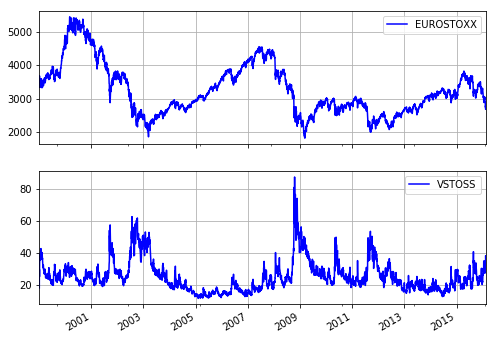

In [172]:
data.plot(subplots=True,grid=True,style='b',figsize=(8,6))

上图表明两个指数之间似乎有某种负相关，为了得到更为正式的论据，应该再次使用两个金融时间序列的对数收益率：

In [173]:
rets = np.log(data/data.shift(1))
rets.head()

,EUROSTOXX,VSTOSS
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001447EA20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000149DB358>], dtype=object)

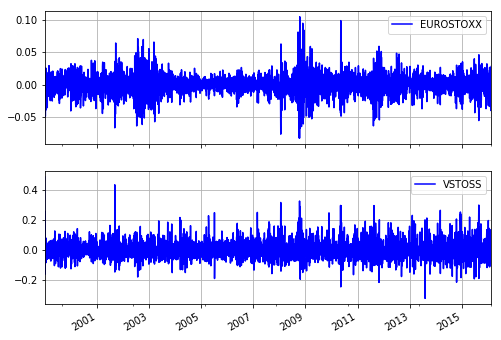

In [174]:
rets.plot(subplots=True,grid=True,style='b',figsize=(8,6))

已经有了实施回归分析的所有数据，接下来，将EURO STOXX 50收益率作为自变量，而将VSTOXX收益率作为因变量：

In [186]:
import statsmodels.api as sm
#rets=rets.dropna()
rets["intercept"]=1.0#加入截距项
xdat = rets[['EUROSTOXX','intercept']]
ydat = rets['VSTOSS']
model = sm.OLS(ydat,xdat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOSS   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5212.
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:10:45   Log-Likelihood:                 7966.3
No. Observations:                4386   AIC:                        -1.593e+04
Df Residuals:                    4384   BIC:                        -1.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EUROSTOXX     -2.8461      0.039    -72.194      0.000      -2.923      -2.769
intercept   -9.51e-06      0.001     -0.016      0.987      -0.001       0.001
==============================================================================
Omnibus:                     1316.059   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24623.464
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                      14.451   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

显然，的确存在强负相关，可以这样查看最终模型的参数：

In [187]:
results.params

EUROSTOXX   -2.846059
intercept   -0.000010
dtype: float64

这个输入与原始对数收益率数据相结合，生成下图，该图表强烈支持杠杆效应：

Text(0,0.5,u'VSTOXX returns')

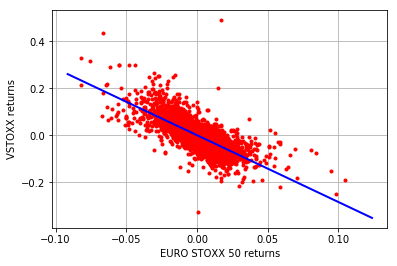

In [197]:
plt.plot(xdat['EUROSTOXX'],ydat,'r.')
ax = plt.axis()
x = np.linspace(ax[0],ax[1]+0.01)
plt.plot(x,results.params[1] + results.params[0] * x,'b',lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')